In [6]:
from pathlib import Path
# Params
PATH_OUTPUT=Path("../output-rodan-smoothctc/")
MODEL=""
CHECKPOINT=""
DATETIME_FORMAT="%a %b %d %H:%M:%S %Y"
SPECIES=[
    "human",
    # "mouse",
    "arabidopsis",
    "poplar",
    # "yeast"
]

In [7]:
import json
import datetime
import seaborn as sns
import pandas as pd
import numpy as np

## Training 

In [8]:
path_metrics = PATH_OUTPUT.joinpath("training/metrics.csv")
metrics = pd.read_csv(path_metrics, index_col=False)
metrics.tail()

,timestamp,epoch,train_loss,val_loss
18,Tue Aug 29 11:15:26 2023,19,1.050382,1.028481
19,Tue Aug 29 16:16:54 2023,20,1.037445,1.011102
20,Tue Aug 29 21:18:24 2023,21,1.025223,0.994668
21,Wed Aug 30 02:19:52 2023,22,1.013702,0.984639
22,Wed Aug 30 07:21:25 2023,23,1.002708,0.973022


Text(0, 0.5, 'CTC Loss')

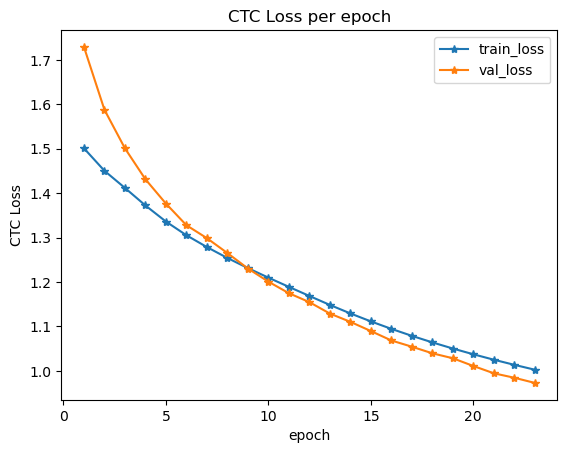

In [9]:
ax = metrics.plot(x="epoch", y=["train_loss","val_loss"], kind="line",marker="*")
ax.set_title("CTC Loss per epoch")
ax.set_ylabel("CTC Loss")

In [10]:
times=metrics["timestamp"]
str2datetime = lambda t: datetime.datetime.strptime(t,DATETIME_FORMAT)
avg_time_epoch=np.mean([ (str2datetime(tf)-str2datetime(ti)).total_seconds() / 60  for tf,ti in zip(times[1:],times[:-1])])

print(f"Average time per epoch: {avg_time_epoch} [min] | {avg_time_epoch/60} [hr]")

Average time per epoch: 300.99015151515147 [min] | 5.016502525252524 [hr]


### Basecalling
For each species, report:
- number of reads: 100.000
- number of mapped reads
- percentage of mapped reads
- accuracy of mapped reads
- total time spent in the basecalling


In [11]:
# def time_from_log(path_log):
path_log = "../logs/basecall_arabidopsis.err.log"

def time_from_log(path_log):
    with open(path_log) as fp:
        for line in fp.readlines():
            if "Elapsed (wall clock) time (h:mm:ss or m:ss):" in line:
                time = line.split(": ")[-1]
                time = time.replace("\n","")

    return time


In [12]:

def load_metrics(path_test):
    metrics = []
    for specie in SPECIES:
        print(specie)
        # log path
        if "orig" in str(path_test):
            path_log = f"../logs/basecall-rodan-orig_{specie}.err.log"
        elif "smoothctc" in str(path_test):
            path_log = path_test.parent.joinpath(f"logs/basecall-{specie}.err.log")
        else:
            path_log = f"../logs/basecall_{specie}.err.log"
        
        with open(path_test.joinpath(f"{specie}-accuracy.json")) as fp:
            specie_metrics = json.load(fp)
            specie_metrics["specie"] = specie
            specie_metrics["time"] = time_from_log(path_log) 
        
        metrics.append(specie_metrics)
    
    return pd.DataFrame(metrics)

In [13]:
PATH_RODAN_CTC = Path("../output-rodan/basecalling/test")
load_metrics(PATH_RODAN_CTC)

human


arabidopsis
poplar


,n_reads,median_accuracy,average_accuracy:,std,specie,time
0,975,0.728875,0.729329,0.028788,human,4:08:18
1,1484,0.742055,0.742156,0.022577,arabidopsis,3:42:05
2,977,0.744061,0.745282,0.022043,poplar,3:24:24


In [14]:
PATH_RODAN_ORIG = Path("../output-rodan-orig/basecalling/test")
load_metrics(PATH_RODAN_ORIG)

human


arabidopsis
poplar


,n_reads,median_accuracy,average_accuracy:,std,specie,time
0,98699,0.931915,0.924354,0.049132,human,3:31:22
1,98999,0.928994,0.922140,0.044024,arabidopsis,3:03:36
2,98335,0.911111,0.901053,0.042162,poplar,2:51:10


In [15]:
PATH_RODAN_SMOOTHCTC = Path("../output-rodan-smoothctc/basecalling/test")
load_metrics(PATH_RODAN_SMOOTHCTC)

human
arabidopsis
poplar


,n_reads,median_accuracy,average_accuracy:,std,specie,time
0,4,0.698233,0.701413,0.017637,human,1:45:42
1,8,0.727910,0.752539,0.053205,arabidopsis,1:27:36
2,7,0.710526,0.708768,0.049206,poplar,1:20:15
